## Import Libaries

In [81]:
# import necessary libaries
# core libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')

# preprocessing libaries
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

#Statistical libaries
from scipy import stats
from scipy.stats import zscore, skew

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


----------------------------------------------------------------
 ### **0. Data Ingestion, Preliminary Data Analysis**
 ---------------------------------------------------------------

In [82]:
# load the dataset
zip_path = r"C:\Users\ncc\Downloads\wine+quality (1).zip"
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.printdir()


File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [83]:
with zipfile.ZipFile(zip_path) as z:
    with z.open("winequality-white.csv") as f:
        df = pd.read_csv(f, sep=";")

In [84]:
#check the dataset is loaded properly
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [85]:
#have a copy of the dataset
df_copy = df.copy()
print("Datatset sucessfully copied")

Datatset sucessfully copied


In [86]:
#check the dataset columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [87]:
#check the information snapshot of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [88]:
# check for missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [89]:
#check for duplicated columns
print("\nDuplicated Rows:")
duplicates = df.duplicated().sum()
print(f"number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")


Duplicated Rows:
number of duplicate rows: 937
Percentage of duplicates: 19.13%


In [90]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [91]:
# check for unque values in the possible target column
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [92]:
# create a quality label column
def quality_category(x):
    if x <=4:
        return "Low"
    elif x <=6:
        return "Medium"
    else:
        return "High"
    

#apply the function to the quality table
df["quality_label"] = df["quality"].apply(quality_category)

In [93]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

In [94]:
df.columns[0]

'fixed acidity'

----------------------------------------------------------------
 ## **1. Exploratory Data analysis**
 
 ### **1i. Univariate analysis**
 ---------------------------------------------------------------

Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

Skewness: 0.648
Kurtosis: 2.172


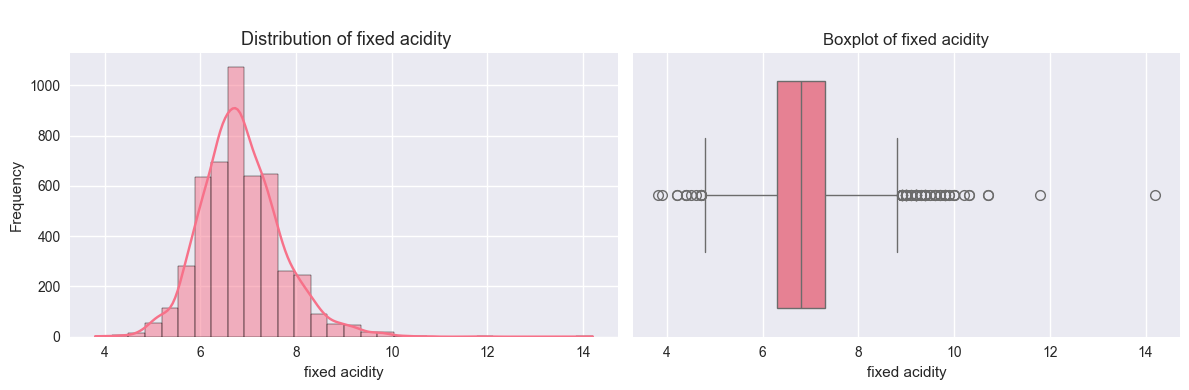


 fixed acidity is moderatly skewed.


In [95]:
    # display summary statictics, skewness, kurtosis, Kde and boxplot for a column
print("Feature:", df.columns[0])
print("="*40)
print(df[df.columns[0]].describe().to_frame())
print(f"\nSkewness:" ,round(df[df.columns[0]].skew(),3))
print(f"Kurtosis:" ,round(df[df.columns[0]].kurt(),3))

#create figur shape for the plots
plt.figure(figsize=(12,4))

# plot Histogram + KDE 
plt.subplot(1,2,1)
sns.histplot(df[df.columns[0]], kde=True, bins=30)
plt.title(f"\n Distribution of {df.columns[0]}", fontsize=13)
plt.xlabel(df.columns[0])
plt.ylabel("Frequency")

# plot boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df[df.columns[0]])
plt.title(f"\nBoxplot of {df.columns[0]}")

plt.tight_layout()
plt.show()

# note on transformation
if abs(df[df.columns[0]].skew()) > 1:
    print(f"\n {df.columns[0]} is highly skewed. Consider log or Box-Cox transformation.")
elif abs(df[df.columns[0]].skew()) > 0.5:
      print(f"\n {df.columns[0]} is moderatly skewed.")
else:
     print(f"\n {df.columns[0]} is fairly skewed.")


In [96]:
#craete a function to allow reusuabilty
def univerate_numerical_eda(df, column):
     """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
     print(f"Feature: {column}")
     print("="*40)
     print(df[column].describe().to_frame())
     print(f"\nSkewness:" ,round(df[column].skew(),3))
     print(f"Kurtosis:" ,round(df[column].kurt(),3))

     #create figur shape for the plots
     plt.figure(figsize=(12,4))

     # plot Histogram + KDE 
     plt.subplot(1,2,1)
     sns.histplot(df[column], kde=True, bins=30)
     plt.title(f"\n Distribution of {column}", fontsize=13)
     plt.xlabel(column)
     plt.ylabel("Frequency")

     # plot boxplot
     plt.subplot(1,2,2)
     sns.boxplot(x=df[column])
     plt.title(f"\nBoxplot of {column}", fontsize=13)

    #show the plots
     plt.tight_layout()
     plt.show()

     # note on transformation
     if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
     elif abs(df[column].skew()) > 0.5:
        print(f"\n {column} is moderatly skewed.")
     else:
        print(f"\n {column} is fairly skewed.")

Feature: fixed acidity
       fixed acidity
count    4898.000000
mean        6.854788
std         0.843868
min         3.800000
25%         6.300000
50%         6.800000
75%         7.300000
max        14.200000

Skewness: 0.648
Kurtosis: 2.172


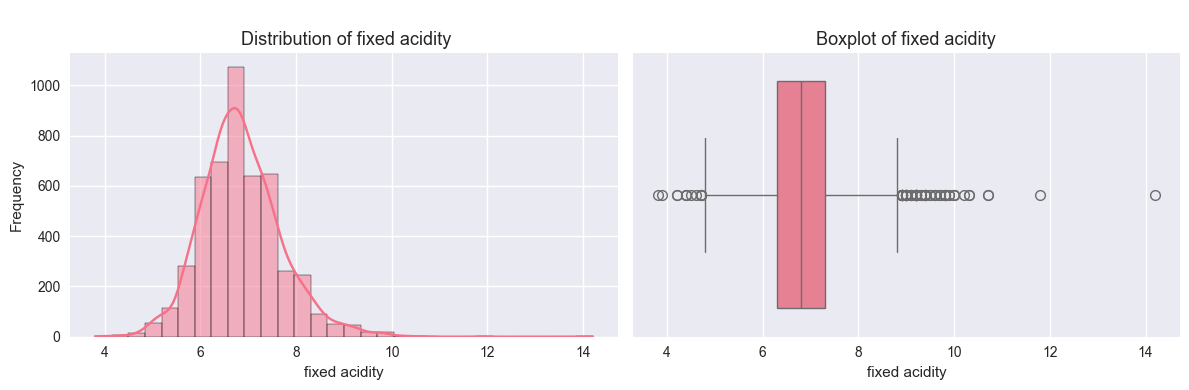


 fixed acidity is moderatly skewed.
Feature: volatile acidity
       volatile acidity
count       4898.000000
mean           0.278241
std            0.100795
min            0.080000
25%            0.210000
50%            0.260000
75%            0.320000
max            1.100000

Skewness: 1.577
Kurtosis: 5.092


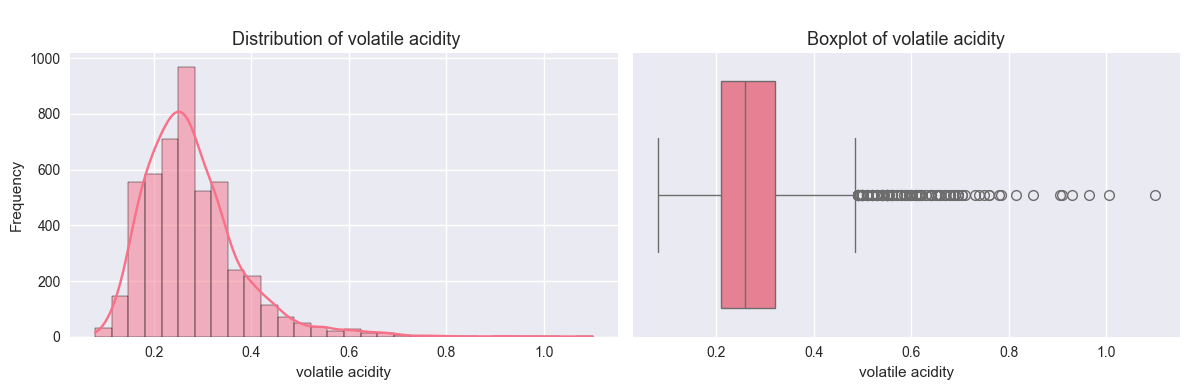


 volatile acidity is highly skewed. Consider log or Box-Cox transformation.
Feature: citric acid
       citric acid
count  4898.000000
mean      0.334192
std       0.121020
min       0.000000
25%       0.270000
50%       0.320000
75%       0.390000
max       1.660000

Skewness: 1.282
Kurtosis: 6.175


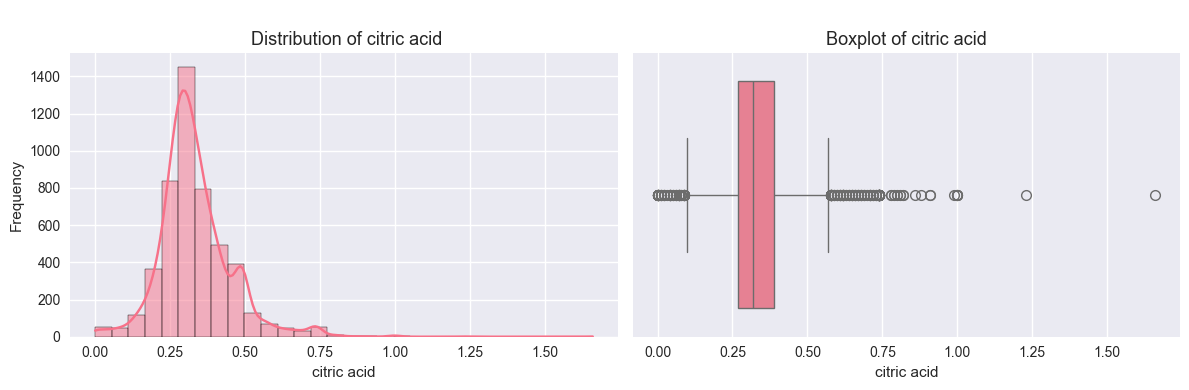


 citric acid is highly skewed. Consider log or Box-Cox transformation.
Feature: residual sugar
       residual sugar
count     4898.000000
mean         6.391415
std          5.072058
min          0.600000
25%          1.700000
50%          5.200000
75%          9.900000
max         65.800000

Skewness: 1.077
Kurtosis: 3.47


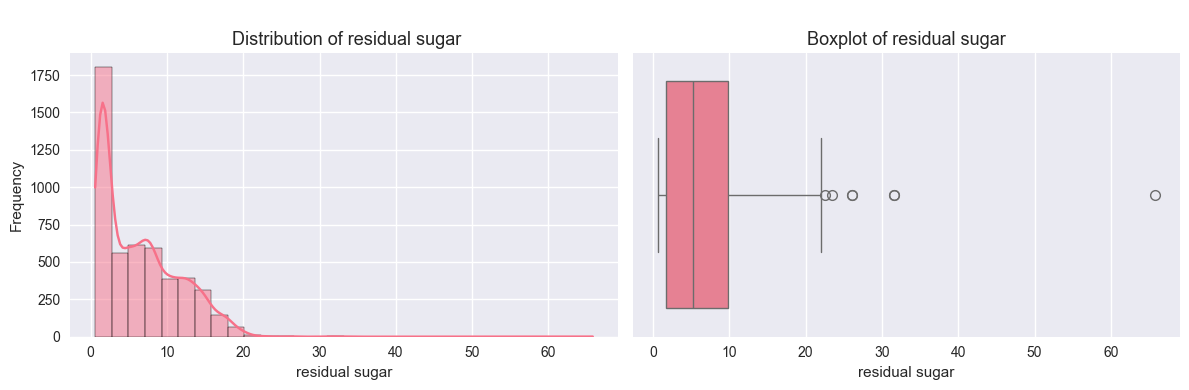


 residual sugar is highly skewed. Consider log or Box-Cox transformation.
Feature: chlorides
         chlorides
count  4898.000000
mean      0.045772
std       0.021848
min       0.009000
25%       0.036000
50%       0.043000
75%       0.050000
max       0.346000

Skewness: 5.023
Kurtosis: 37.565


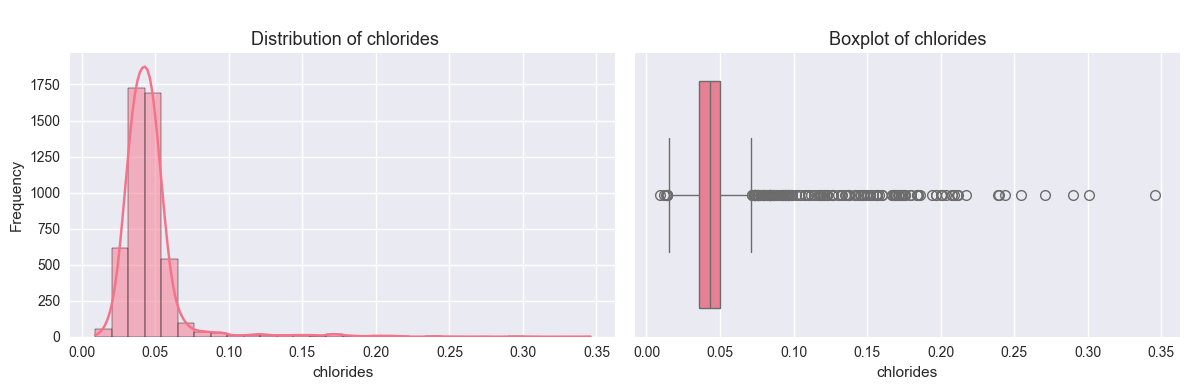


 chlorides is highly skewed. Consider log or Box-Cox transformation.
Feature: free sulfur dioxide
       free sulfur dioxide
count          4898.000000
mean             35.308085
std              17.007137
min               2.000000
25%              23.000000
50%              34.000000
75%              46.000000
max             289.000000

Skewness: 1.407
Kurtosis: 11.466


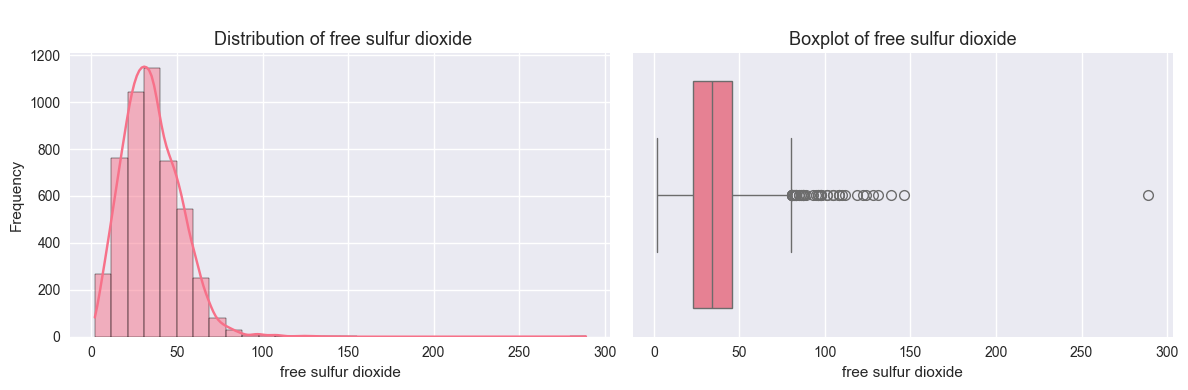


 free sulfur dioxide is highly skewed. Consider log or Box-Cox transformation.
Feature: total sulfur dioxide
       total sulfur dioxide
count           4898.000000
mean             138.360657
std               42.498065
min                9.000000
25%              108.000000
50%              134.000000
75%              167.000000
max              440.000000

Skewness: 0.391
Kurtosis: 0.572


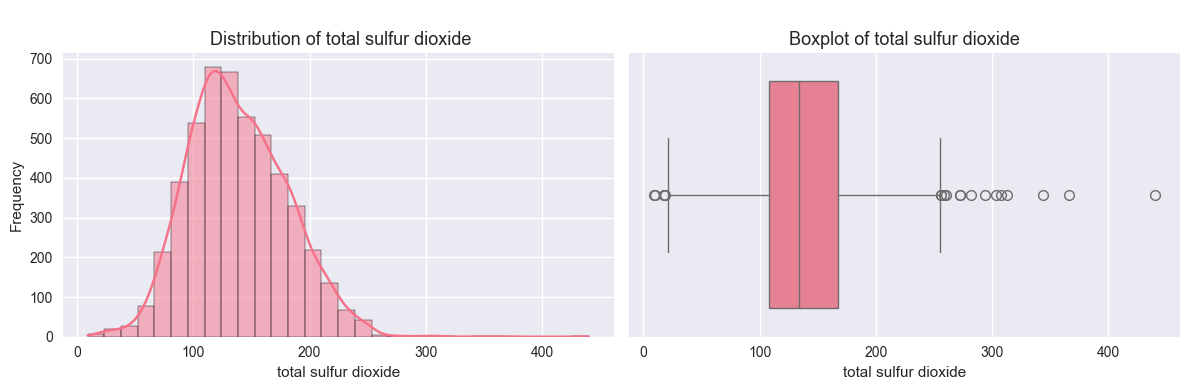


 total sulfur dioxide is fairly skewed.
Feature: density
           density
count  4898.000000
mean      0.994027
std       0.002991
min       0.987110
25%       0.991723
50%       0.993740
75%       0.996100
max       1.038980

Skewness: 0.978
Kurtosis: 9.794


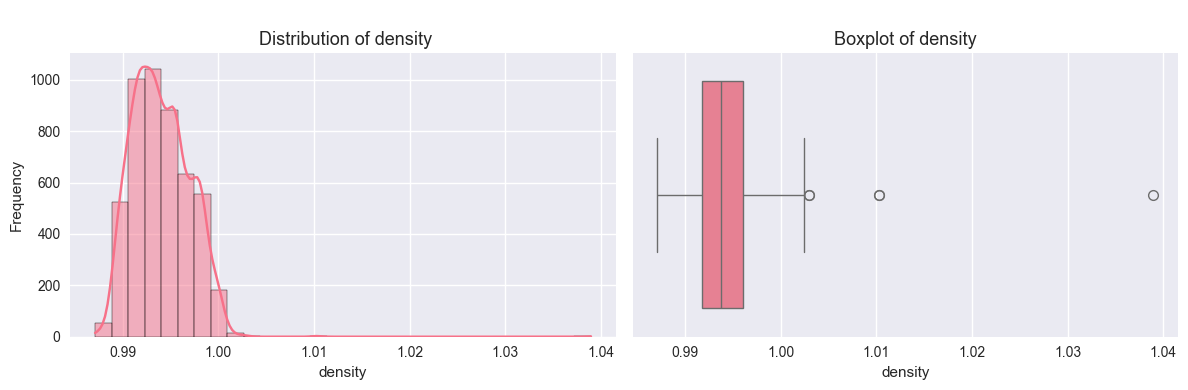


 density is moderatly skewed.
Feature: pH
                pH
count  4898.000000
mean      3.188267
std       0.151001
min       2.720000
25%       3.090000
50%       3.180000
75%       3.280000
max       3.820000

Skewness: 0.458
Kurtosis: 0.531


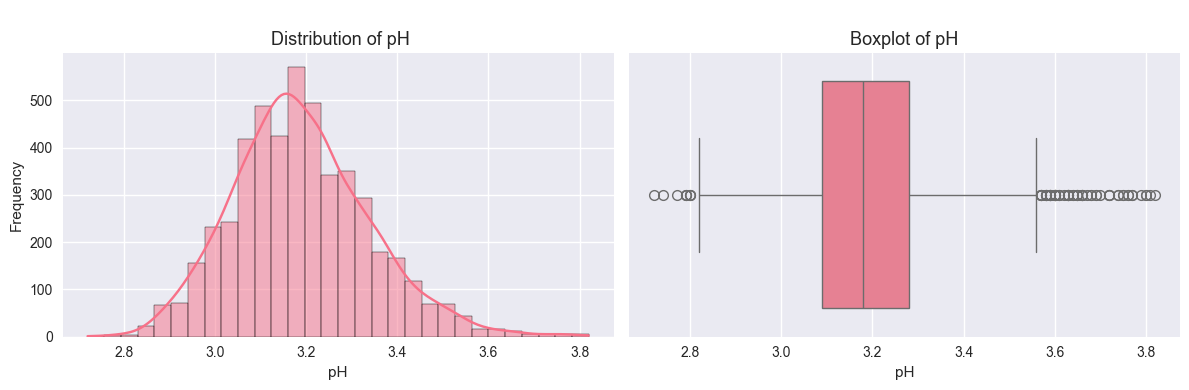


 pH is fairly skewed.
Feature: sulphates
         sulphates
count  4898.000000
mean      0.489847
std       0.114126
min       0.220000
25%       0.410000
50%       0.470000
75%       0.550000
max       1.080000

Skewness: 0.977
Kurtosis: 1.591


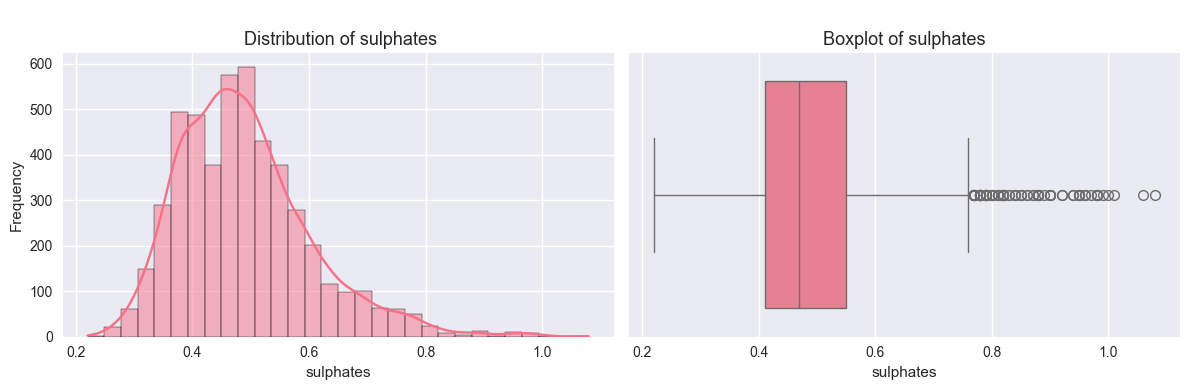


 sulphates is moderatly skewed.
Feature: alcohol
           alcohol
count  4898.000000
mean     10.514267
std       1.230621
min       8.000000
25%       9.500000
50%      10.400000
75%      11.400000
max      14.200000

Skewness: 0.487
Kurtosis: -0.698


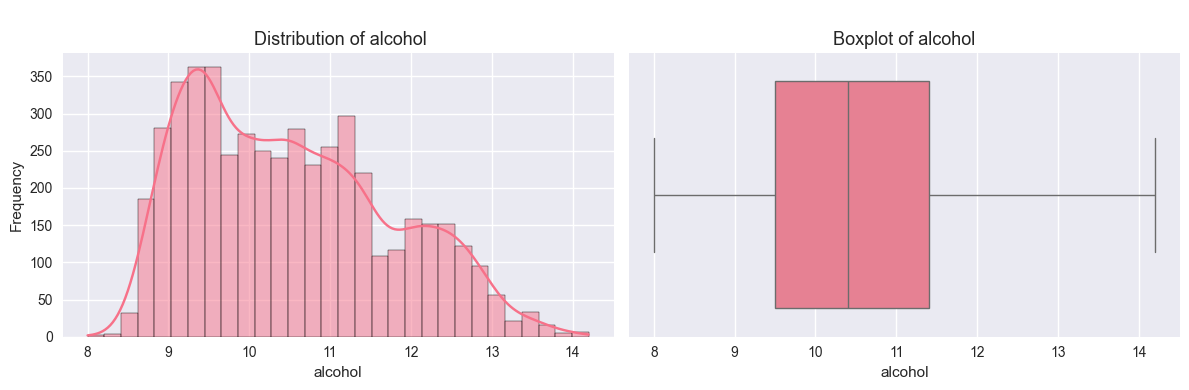


 alcohol is fairly skewed.
Feature: quality
           quality
count  4898.000000
mean      5.877909
std       0.885639
min       3.000000
25%       5.000000
50%       6.000000
75%       6.000000
max       9.000000

Skewness: 0.156
Kurtosis: 0.217


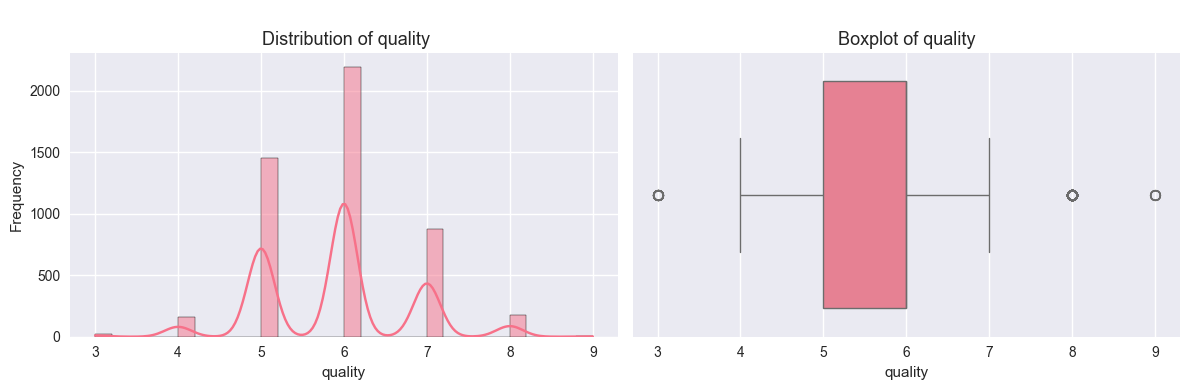


 quality is fairly skewed.


In [97]:
# apply the function and loop to check for the remaining columns
for col in num_features:
    univerate_numerical_eda(df, col)

Feature: quality_label
               Count  Percentage
quality_label                   
Medium          3655       74.62
High            1060       21.64
Low              183        3.74



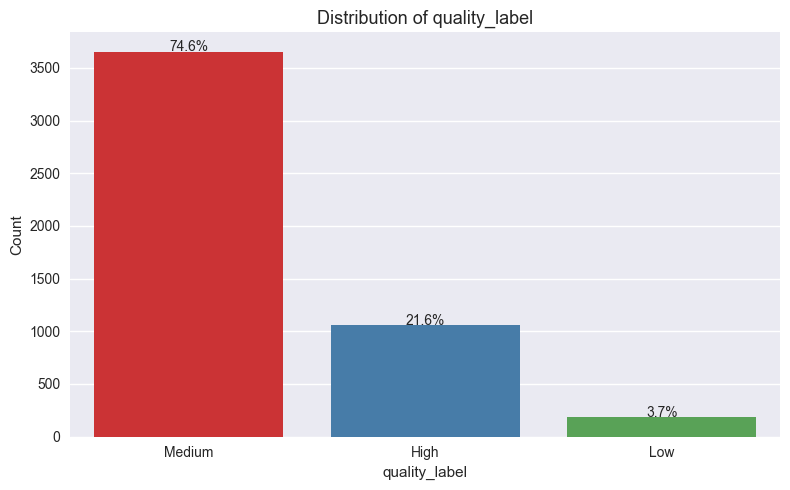

In [98]:
# display frequency table, proportion, and countplot.performs eda on a categorical or ordinal column
print(f"Feature:",df.columns[-1])
print("="*40)

# Frequency + proportion
freq = df[df.columns[-1]].value_counts()
prop = df[df.columns[-1]].value_counts(normalize=True) * 100
summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
print(summary)
print()

#Visualization
plt.figure(figsize=(8,5))
ax = sns.countplot(x=df[df.columns[-1]], data=df, palette='Set1', order=freq.index)
plt.title(f'Distribution of {df.columns[-1]}', fontsize=13)
plt.xlabel(df.columns[-1])
plt.ylabel('Count')


# Annotate each bar with percentage
total = len(df[df.columns[-1]],)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

plt.tight_layout()
plt.show()

| Feature Type                     | Observation                                                                                                          | What It Means / Implication                                                                                                                             |
| -------------------------------- | -------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Most numeric features**        | Continuous, but several (e.g., `volatile acidity`,`citric acid`,`residual sugar`,`chlorides`,`free sulphur`) are **right-skewed** | These long tails can distort algorithms sensitive to scale (e.g., linear regression, KNN ).  We might apply **log or Box-Cox transformation** to normalize. |
| **`alcohol`**                    | Often roughly symmetric but **wide range**                                                                           | Important predictor — normalization or standardization can stabilize learning.                                                                          |
| **`Fixied acidity and Density`**           | Often slightly right-skewed                                                                                          | Outliers might indicate poor fermentation  we will check relationships with `quality` later.                                                             |
| **Outliers visible in boxplots** | Especially in sulfur-related variables                                                                               | Before modeling, we must decide: **clip, transform, or leave** (some are natural domain outliers).                                                      |
| **`quality` (numeric)**          | Discrete integers, concentrated in 5–6                                                                               | Dataset is **imbalanced** — middle (Medium quality) dominates.                                                                                          |


| Insight                              | Why It Matters                                                                                                 | Actionable Step                                                                  |
| ------------------------------------ | -------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| **Skewed variables**                 | Some algorithms (like linear/logistic regression, SVMs, KNNs) assume features are approximately normal.        | Apply transformations (`np.log1p`, `StandardScaler`, etc.) where needed.         |
| **Wide feature ranges**              | Features measured on different scales (e.g., pH ~3–4, sulfur dioxide ~0–300) can cause biased weight learning. | Use **scaling** (e.g., StandardScaler or MinMaxScaler).                          |
| **Outliers**                         | May heavily influence mean-based models.                                                                       | Investigate domain causes - use **IQR-based clipping or robust scaling**.        |
| **Imbalanced target**                | ML models may favor the majority class (“Medium”).                                                             | Use **resampling** (SMOTE, stratified split) or **class weights** later.         |
| **Ordinal target (`quality_label`)** | Although `quality` is numeric, its meaning is ordinal.                                                         | Consider both: regression (numeric quality) or classification (Low/Medium/High). |


----------------------------------------------------------------
 ### **1ii. Bivariate analysis**
 ---------------------------------------------------------------

In [99]:
#convert num_features to dataframe
df_num = pd.DataFrame(df[num_features])
# check if converted properly
df_num.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [100]:
# create function to check corelation with target

def correlation_with_target(df, target_col, figsize=(10,2)):
     """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
     # keep only numeric columns
     numeric_df = df.select_dtypes(include='number').copy()
     if target_col not in numeric_df.columns:
          raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")
     
     # compute correlations of every numeric column with the target
     corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

     corrs_df = corrs.to_frame(name="corr").T


     # plot the correlation heatmap
     plt.figure(figsize=figsize)
     sns.heatmap(
          corrs_df,
          annot=True,
          cmap="coolwarm",
          fmt=".3f",
          center=0,
          vmin=1,
          vmax=1, 
          cbar_kws={'orientation': 'vertical', 'shrink':0.7}
     )
     # sns.color_palette("coolwarm", as_cmap=True)
     plt.xticks(rotation=45, ha="right")
     plt.yticks([0], [target_col], rotation=0)
     plt.title(f"Correlation of numeric features with {target_col}", fontsize=12)
     plt.tight_layout()
     plt.show()

     # return sorted correlations for downstream use
     return corrs.reindex(corrs.abs().sort_values(ascending=False).index)



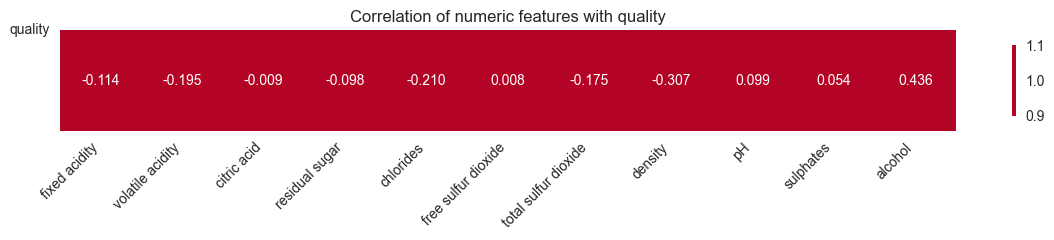

alcohol                 0.435575
density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
pH                      0.099427
residual sugar         -0.097577
sulphates               0.053678
citric acid            -0.009209
free sulfur dioxide     0.008158
dtype: float64


In [101]:
corr_series = correlation_with_target(df, 'quality', figsize=(12,2.5))
print(corr_series) 

In [102]:
from scipy.stats import pearsonr
def  numeric_biverate_plot(df, x_col, y_col):
     """
    Plots the relationship between two numeric variables with a regression line
    and displays the correlation coefficient.

    Parameters:
    -----------
    df : pandas.DataFrame
        Dataset containing the numeric columns
    x_col : str
        Name of the first numeric variable (x-axis)
    y_col : str
        Name of the second numeric variable (y-axis)
    """
     

     #Calculate correlation coefficient
     corr, p_value = pearsonr(df[x_col], df[y_col])

     #create plot
     plt.figure(figsize=(8,5))
     sns.regplot(data=df, x=x_col,y=y_col, scatter_kws={"alpha":0.5}, line_kws={'color':'red'})


     # title and labels
     plt.title(f"{y_col} vs {x_col}\nCorrelation: {corr:.3f} (p={p_value:.3f})", fontsize=13)
     plt.xlabel(x_col, fontsize=11)
     plt.ylabel(y_col, fontsize=11)
     plt.grid(alpha=0.3)
     plt.show()



In [103]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

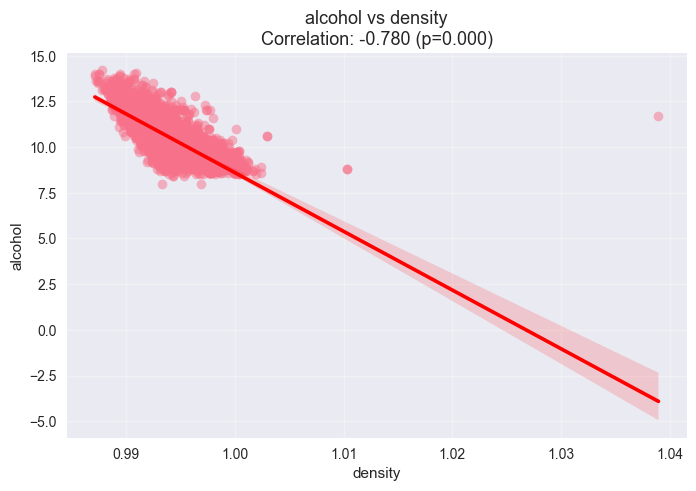

In [104]:
numeric_biverate_plot(df, 'density', 'alcohol')

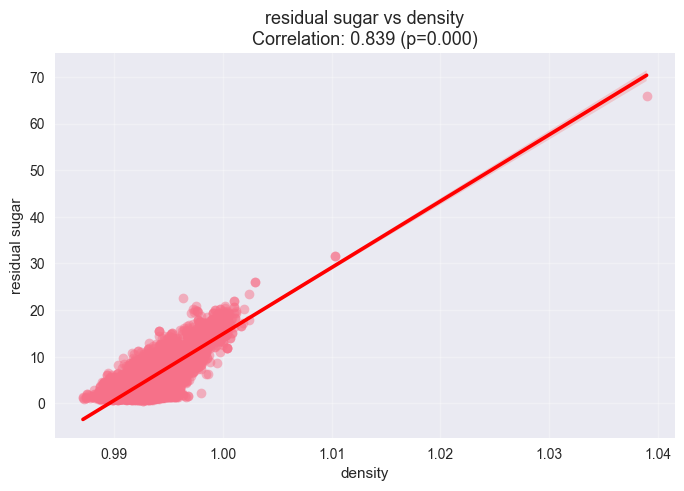

In [105]:
numeric_biverate_plot(df, 'density', 'residual sugar')

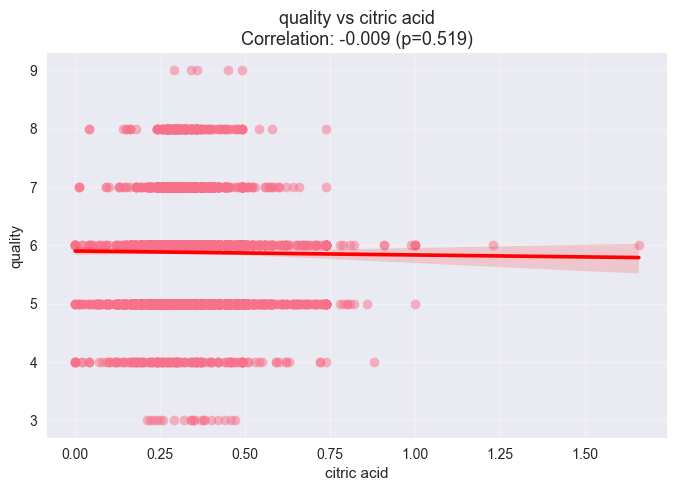

In [106]:
numeric_biverate_plot(df,'citric acid', 'quality')

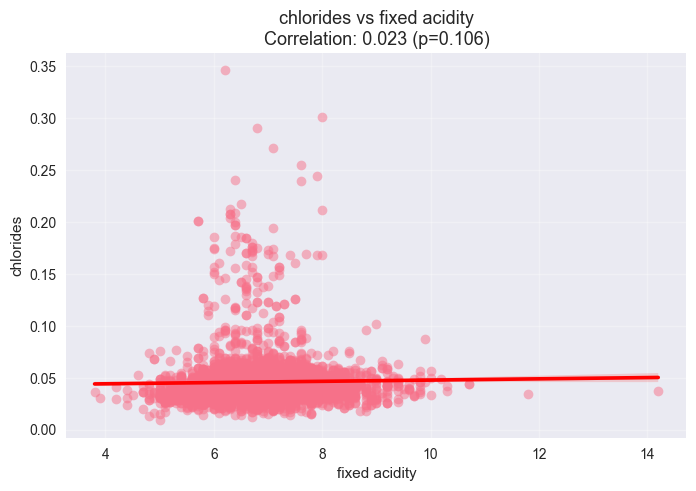

In [107]:
numeric_biverate_plot(df, df.columns[0], df.columns[4])

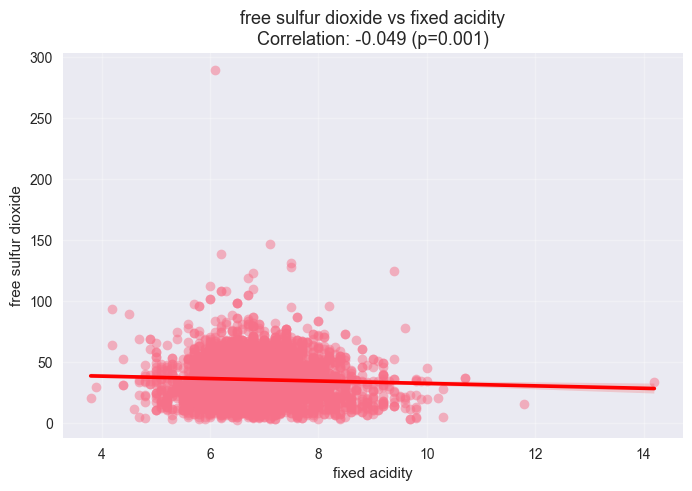

In [108]:
numeric_biverate_plot(df, df.columns[0], df.columns[5])

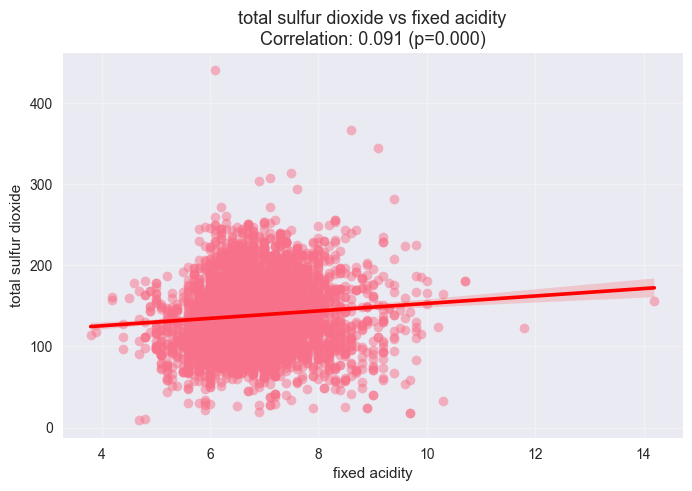

In [109]:
numeric_biverate_plot(df, df.columns[0], df.columns[6])

In [110]:
def biverate_num_cat(df,feature, target='quality_label'):
     """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
     print(f" Feature: {feature} vs {target}")
     print("="*50)

     
    # Group summary
     summary = df.groupby(target)[feature].describe()[["mean", "std", 'min','max']]
     print(summary)
     print()

     plt.figure(figsize=(10,5))

     #boxplot + meanline
     sns.boxplot(x=target, y=feature,data=df, palette='Set2')
     plt.title(f"Boxplot of {feature} against {target}")
     plt.xlabel(target)
     plt.ylabel(feature)
     plt.show()


In [111]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

 Feature: fixed acidity vs quality_label
                   mean       std  min   max
quality_label                               
High           6.725142  0.768798  3.9   9.2
Low            7.180874  1.171885  4.2  11.8
Medium         6.876060  0.839049  3.8  14.2



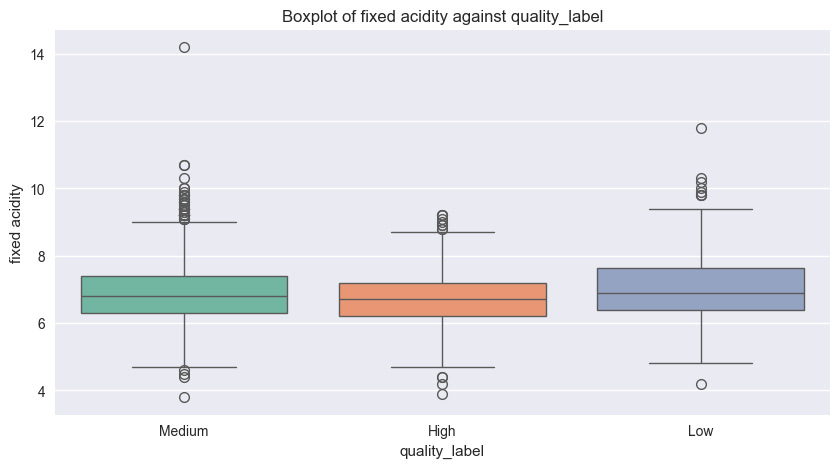

 Feature: volatile acidity vs quality_label
                   mean       std   min    max
quality_label                                 
High           0.265349  0.094097  0.08  0.760
Low            0.375984  0.170525  0.11  1.100
Medium         0.277086  0.095253  0.08  0.965



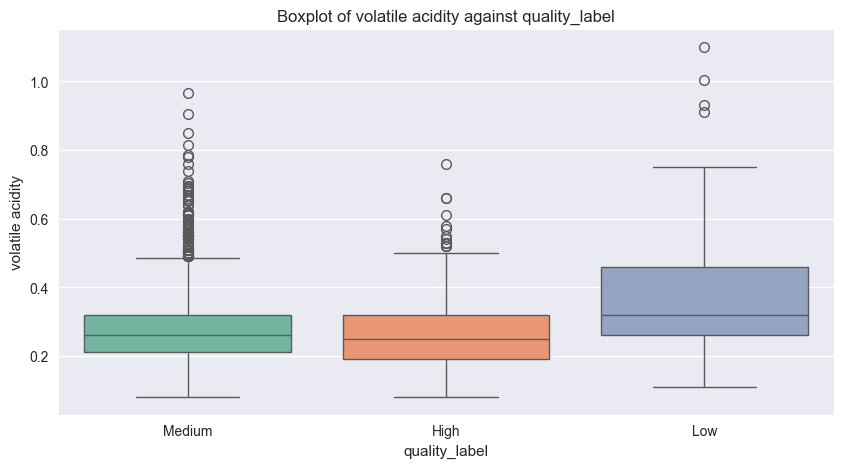

 Feature: citric acid vs quality_label
                   mean       std   min   max
quality_label                                
High           0.326057  0.080288  0.01  0.74
Low            0.307705  0.157131  0.00  0.88
Medium         0.337877  0.128304  0.00  1.66



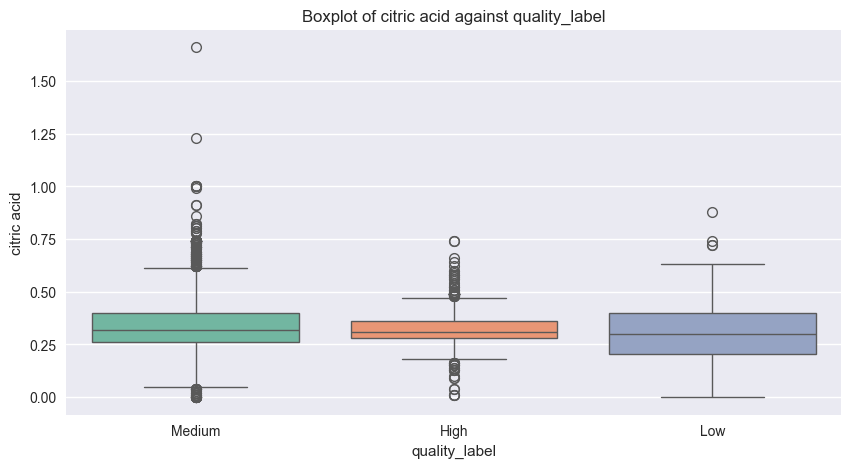

 Feature: residual sugar vs quality_label
                   mean       std  min    max
quality_label                                
High           5.261509  4.290845  0.8  19.25
Low            4.821038  4.322845  0.7  17.55
Medium         6.797729  5.248933  0.6  65.80



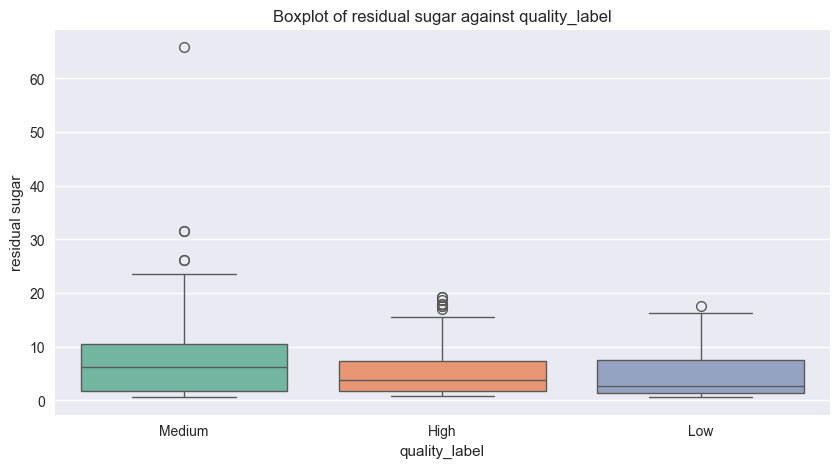

 Feature: chlorides vs quality_label
                   mean       std    min    max
quality_label                                  
High           0.038160  0.011145  0.012  0.135
Low            0.050557  0.028700  0.013  0.290
Medium         0.047740  0.023256  0.009  0.346



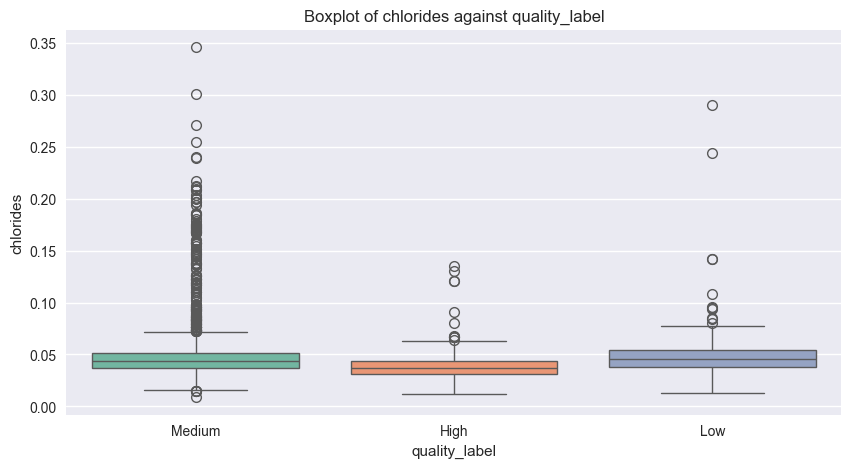

 Feature: free sulfur dioxide vs quality_label
                    mean        std  min    max
quality_label                                  
High           34.550472  13.797146  5.0  108.0
Low            26.633880  31.001858  3.0  289.0
Medium         35.962107  16.740109  2.0  131.0



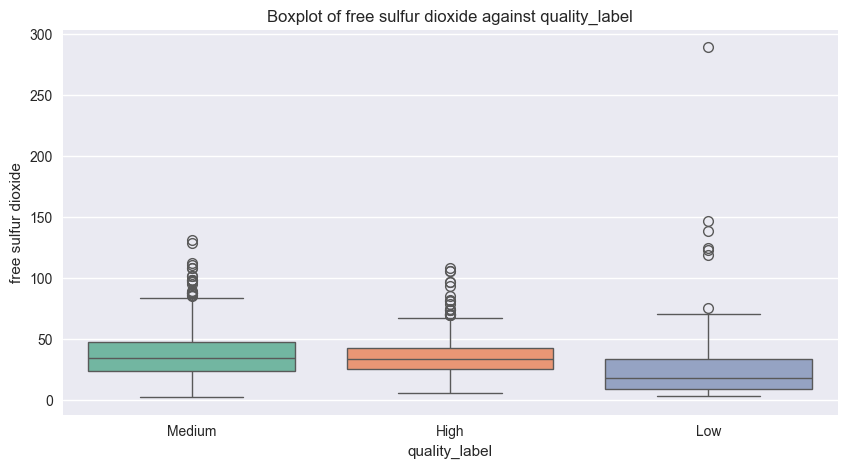

 Feature: total sulfur dioxide vs quality_label
                     mean        std   min    max
quality_label                                    
High           125.245283  32.724848  34.0  229.0
Low            130.232240  62.373163  10.0  440.0
Medium         142.571272  42.957893   9.0  344.0



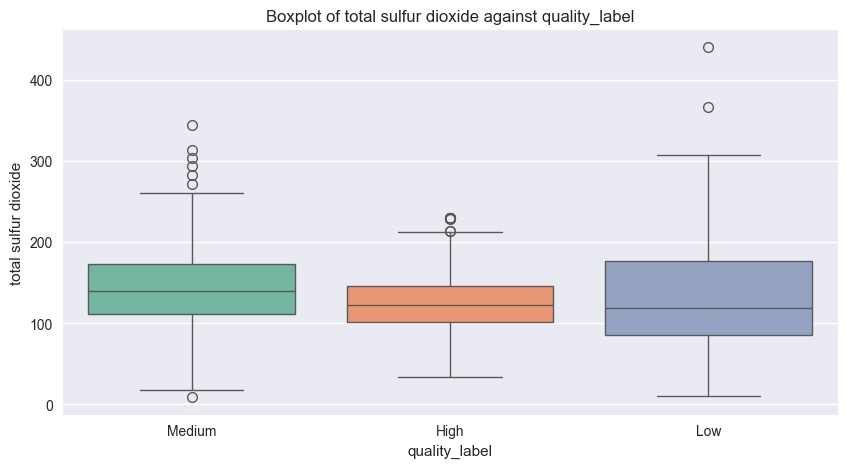

 Feature: density vs quality_label
                   mean       std      min      max
quality_label                                      
High           0.992412  0.002772  0.98711  1.00060
Low            0.994343  0.002504  0.98920  1.00040
Medium         0.994480  0.002913  0.98722  1.03898



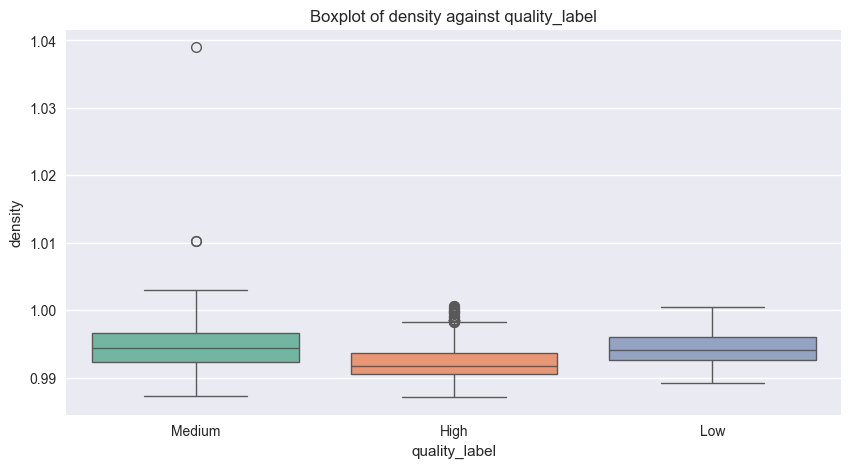

 Feature: pH vs quality_label
                   mean       std   min   max
quality_label                                
High           3.215132  0.157185  2.84  3.82
Low            3.183388  0.168668  2.83  3.72
Medium         3.180720  0.147352  2.72  3.81



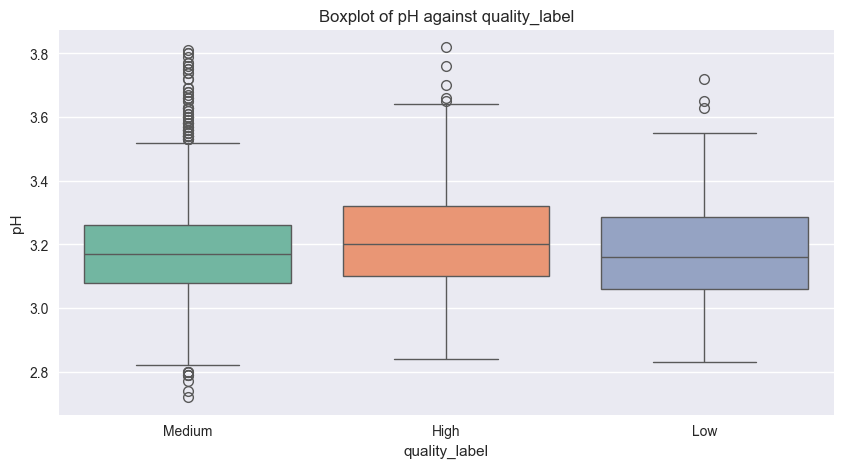

 Feature: sulphates vs quality_label
                   mean       std   min   max
quality_label                                
High           0.500142  0.133044  0.22  1.08
Low            0.475956  0.117847  0.25  0.87
Medium         0.487557  0.107647  0.23  1.06



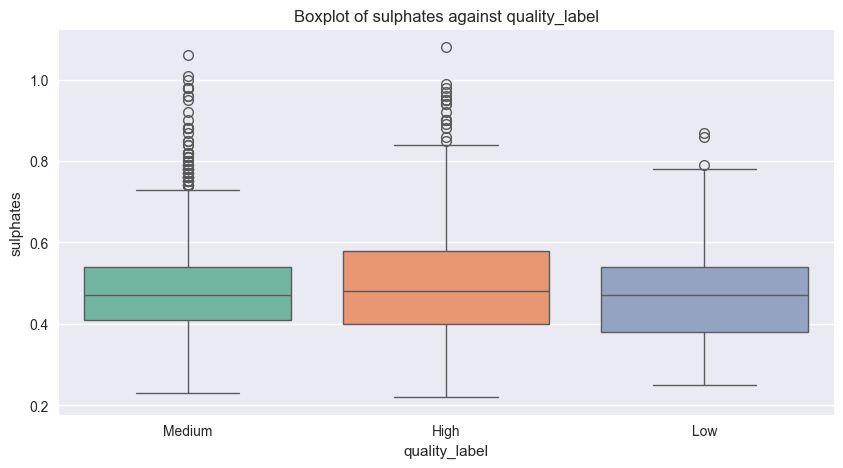

 Feature: alcohol vs quality_label
                    mean       std  min   max
quality_label                                
High           11.416022  1.255209  8.5  14.2
Low            10.173497  1.027570  8.0  13.5
Medium         10.269808  1.104035  8.0  14.0



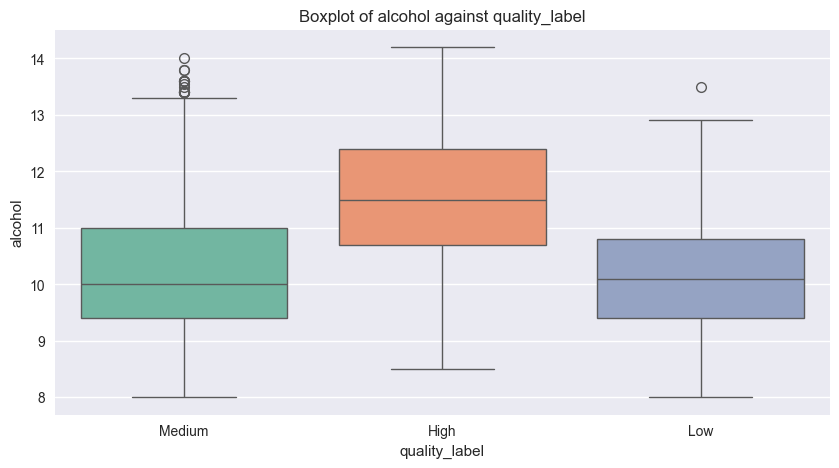

 Feature: quality vs quality_label
                   mean       std  min  max
quality_label                              
High           7.174528  0.391978  7.0  9.0
Low            3.890710  0.312858  3.0  4.0
Medium         5.601368  0.489684  5.0  6.0



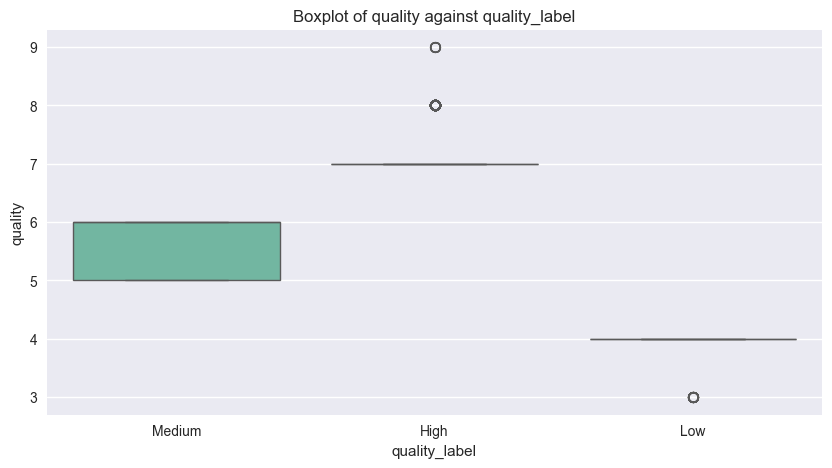

In [112]:
for col in df_num.columns:
    biverate_num_cat(df, col)


----------------------------------------------------------------
 ### **1iii. Trivariate analysis**
 ---------------------------------------------------------------

In [113]:
def trivariate_plot(df, x_col, y_col, hue_col):
    """
    Visualizes the relationship between two numeric variables
    with a third categorical variable shown by color (hue).
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataset.
    x_col : str
        The first numeric feature (x-axis).
    y_col : str
        The second numeric feature (y-axis).
    hue_col : str
        The categorical feature (color grouping).
    """

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


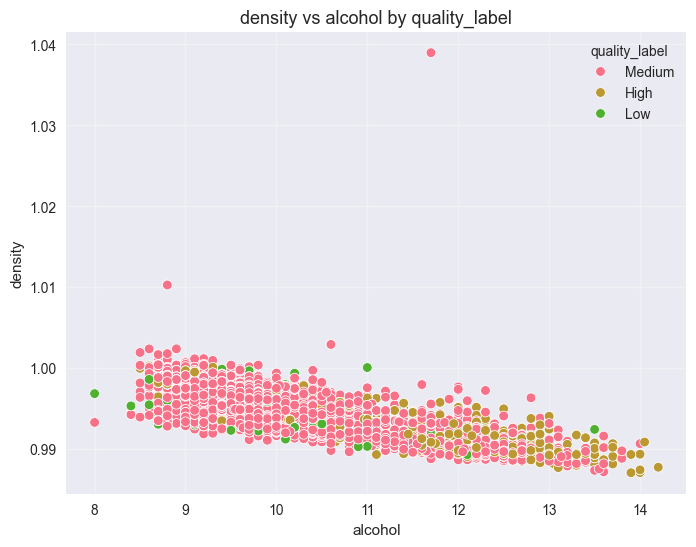

In [114]:
# Example: explore alcohol vs density by wine quality category
trivariate_plot(df, 'alcohol', 'density', 'quality_label')


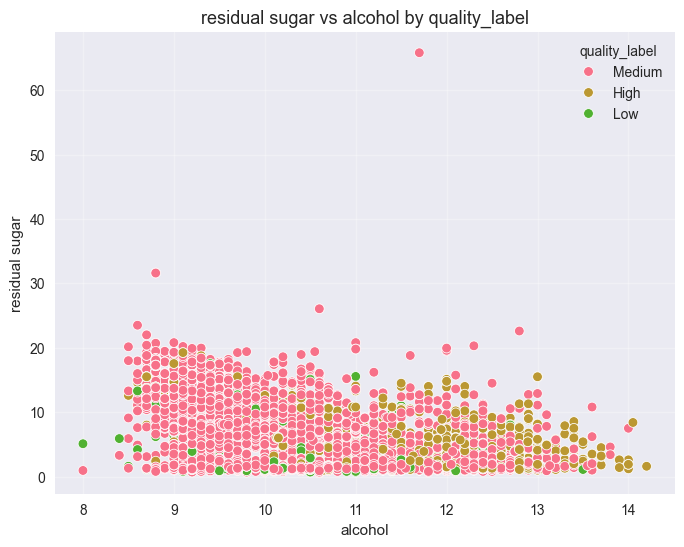

In [115]:
# Example: explore alcohol vs density by wine quality category
trivariate_plot(df, 'alcohol', 'residual sugar', 'quality_label')

 ##### **1iiii. Multivariate analysis**

In [116]:
def grouped_summary(df):
    """
    Computes summary statistics grouped by wine quality.
    """
    summary = df.groupby('quality').mean(numeric_only=True).round(2)
    return summary

In [117]:
grouped_summary(df_num)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.60,0.33,0.34,6.39,0.05,53.32,170.60,0.99,3.19,0.47,10.34
4,7.13,0.38,0.30,4.63,0.05,23.36,125.28,0.99,3.18,0.48,10.15
5,6.93,0.30,0.34,7.33,0.05,36.43,150.90,1.00,3.17,0.48,9.81
6,6.84,0.26,0.34,6.44,0.05,35.65,137.05,0.99,3.19,0.49,10.58
7,6.73,0.26,0.33,5.19,0.04,34.13,125.11,0.99,3.21,0.50,11.37
8,6.66,0.28,0.33,5.67,0.04,36.72,126.17,0.99,3.22,0.49,11.64
9,7.42,0.30,0.39,4.12,0.03,33.40,116.00,0.99,3.31,0.47,12.18


# **DATA PREPROCESSING BASED ON EDA INSIGHTS**

## 1.Handle duplicates

In [118]:

if duplicates > 0:
    print(f"Removing {duplicates} duplicate Rows...")
    df_copy = df_copy.drop_duplicates()
    print(f"Dataset shape after removing duplicates: {df_copy.shape}")
else:
     print("No duplicates to remove ")


Removing 937 duplicate Rows...
Dataset shape after removing duplicates: (3961, 12)


In [119]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label'],
      dtype='object')

#### **2. Log-Transform Skewed Variables (EDA Recommendation)**

In [120]:
# Log-transform skewed variables as recommended by EDA
print("=== LOG-TRANSFORMING SKEWED VARIABLES ===")
print("EDA identified these variables as right-skewed and recommended log transformation:")

# Variables to log-transform based on EDA findings
skewed_col = ['volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide']
for col in skewed_col:
    if col in df_copy.columns:
        # check if column has zero or negative values
        min_val = df_copy[col].min()
        if min_val <= 0:
             # Use log1p for variables with zeros
             df_copy[f"{col}_log"] = np.log1p(df_copy[col])
             print(f" {col}: Applied log1p transformation (had {min_val:.3f} minimum value)")
        else:
            # Use log for positive values only
            df_copy[f"{col}_log"] = np.log(df_copy[col])
            print(f"{col}: Applied log transformation")

            # check skewness before and after
            original_skew = skew(df_copy[col])
            transformed_skew = skew(df_copy[f"{col}_log"])
            print(f"  Original skewness: {original_skew:.3f} → Transformed skewness: {transformed_skew:.3f}")


print(f"\nDataset shape after log transformation: {df_copy.shape}")
print("New log-transformed columns:", [col for col in df_copy.columns if '_log' in col])


=== LOG-TRANSFORMING SKEWED VARIABLES ===
EDA identified these variables as right-skewed and recommended log transformation:
volatile acidity: Applied log transformation
  Original skewness: 1.640 → Transformed skewness: 0.172
 citric acid: Applied log1p transformation (had 0.000 minimum value)
residual sugar: Applied log transformation
  Original skewness: 1.333 → Transformed skewness: -0.058
chlorides: Applied log transformation
  Original skewness: 4.967 → Transformed skewness: 1.221
free sulfur dioxide: Applied log transformation
  Original skewness: 1.566 → Transformed skewness: -0.908

Dataset shape after log transformation: (3961, 17)
New log-transformed columns: ['volatile acidity_log', 'citric acid_log', 'residual sugar_log', 'chlorides_log', 'free sulfur dioxide_log']


In [122]:
df_copy.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'volatile acidity_log',
       'citric acid_log', 'residual sugar_log', 'chlorides_log',
       'free sulfur dioxide_log'],
      dtype='object')

#### **3. Outlier Treatment (EDA Recommendation)**

In [ ]:
# print("=== OUTLIER TREATMENT (IQR-CAPPING METHOD) ===")
# print("EDA recommended IQR-capping for outliers to preserve data points")

# # Define numerical columns (excluding target)
# numerical_cols = df_copy.select_dtypes(include=[np.number]).columns.tolist()
# if "quality" in numerical_cols:
#     numerical_cols.remove("quality" )

# print(f"Treating outliers in {len(numerical_cols)} numerical features...")
# outliers_capped = 0
# for col in numerical_cols:
#     Q1 = df_copy[col].quantile(0.25)
#     Q3 = df_copy[col].quantile(0.75)
#     IQR =Q3 -Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 - 1.5 * IQR
    
#     outlier_before = ((df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)).sum()
#     if outlier_before > 0:
#         # Cap outliers
#         df_copy[col] = np.where(df_copy[col] < lower_bound, lower_bound, df_copy[col])
#         df_copy[col] = np.where(df_copy[col] > upper_bound, upper_bound, df_copy[col])
#         outliers_capped += outlier_before
#         print(f"✓ {col}: Capped {outlier_before} outliers")

# print(f"\nTotal outliers capped: {outliers_capped}")
# print(f"Dataset shape after outlier treatment: {df_copy.shape}")

    

=== OUTLIER TREATMENT (IQR-CAPPING METHOD) ===
EDA recommended IQR-capping for outliers to preserve data points
Treating outliers in 16 numerical features...
✓ fixed acidity: Capped 305 outliers
✓ volatile acidity: Capped 3815 outliers
✓ citric acid: Capped 3643 outliers
✓ residual sugar: Capped 3961 outliers
✓ chlorides: Capped 3718 outliers
✓ free sulfur dioxide: Capped 3685 outliers
✓ total sulfur dioxide: Capped 3714 outliers
✓ density: Capped 3778 outliers
✓ pH: Capped 3694 outliers
✓ sulphates: Capped 3770 outliers
✓ alcohol: Capped 3948 outliers
✓ volatile acidity_log: Capped 3648 outliers
✓ citric acid_log: Capped 3656 outliers
✓ residual sugar_log: Capped 3960 outliers
✓ chlorides_log: Capped 3631 outliers
✓ free sulfur dioxide_log: Capped 3581 outliers

Total outliers capped: 56507
Dataset shape after outlier treatment: (3961, 17)


#### **4. Feature Engineering**